In [8]:
#Mathematics and statistics libraries
import math
from math import *

import numpy as np
from numpy import array, dot
import numpy.random as npr
from numpy import linalg as LA
from numpy.linalg import inv
from numpy.random import normal
from numpy import mean
from numpy import std
from numpy import hstack
from numpy import asarray
from numpy import exp
from numpy import random

#import numba as nb
#from numba import guvectorize

from scipy import signal
from scipy import stats as ss
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import cauchy
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import gamma
import scipy.integrate as integrate

#import random
#from random import randint


import statistics
import statsmodels.api as sm

# plotting/graphing related libraries

#data management
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as web
import yfinance as yf

#plotting and graphing libraries
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import matplotlib.mlab as mlab

#3d graphs
import mpl_toolkits.mplot3d as mpl 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#utilities, such as copying time, website data requesting etc.
import copy as copylib
#from progressbar import *
import time
import requests
#date and time management
from datetime import datetime
from datetime import date
from datetime import timedelta
from datetime import timezone
#
from IPython.display import display, HTML
import warnings
import sympy as sym
from sympy import symbols, exp

#excel things
import xlsxwriter
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

#advanced libraries for quantitative finance.
#import QuantLib as ql
import bt
#import arch
#cvx solver
#from cvxpy import *
#import cvxpy as cvx
#quadraticprogramming solvers
#import quadprog
#cvxopt solver
#import cvxopt 
#from cvxopt import matrix
#import cvxopt as opt
#import cvxopt.solvers as optsolvers
#solver framework
#import qpsolvers
#from qpsolvers import solve_qp

#other tools
#from pykalman import KalmanFilter
#import tensorflow as tf
#import itertools
#import portfolioopt as pfopt
#from __future__ import absolute_import
#from .portfolioopt import *
#from .test_portfolioopt import create_test_data
#from sklearn import covariance
#from sklearn.neighbors import KernelDensity

# Import both Lognormal and Normal SABR model classes
#from pysabr import Hagan2002LognormalSABR
#from pysabr import Hagan2002NormalSABR
#from pysabr.helpers import year_frac_from_maturity_label

import random
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.stats import norm 
import pandas as pd
import warnings

from matplotlib import pyplot
%matplotlib inline
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
import numpy as np
import scipy as scp
import scipy.stats as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.special as scsp
from scipy.integrate import quad
from scipy.interpolate import RegularGridInterpolator

Text(0, 0.5, 'Annualised return')

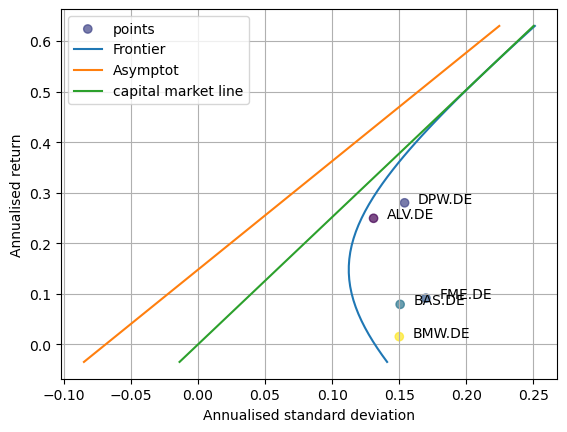

In [44]:
fig, ax = plt.subplots()
data = pd.DataFrame()
TickerDax = ['DPW.DE', 'ALV.DE', 'BMW.DE','FME.DE','BAS.DE']

for x in TickerDax:
    t = yf.Ticker(x)
    yf.pdr_override()
    data[x] = t.history(start='2017-01-01', end='2017-12-31')['Close']
    
r = 0
AFactor = len(data['DPW.DE'])-1
n_TickerDax = len(TickerDax)
Vec1 = np.linspace(1,1, n_TickerDax)

data_R = pd.DataFrame()
Mdata_R = pd.DataFrame()
Sigma = pd.DataFrame()
Sigma_diag = pd.DataFrame()

for x in TickerDax:
    data_R[x] = (data[x]/data[x].shift(1) -1)
    
Sigma = AFactor * data_R.cov()
InvSigma = inv(Sigma)
for x in TickerDax:
    Sigma_diag[x] = [Sigma[x][x]]
    Mdata_R[x] = [float(np.mean(data_R[x]))]
    
Mean = AFactor* Mdata_R.iloc[0]
STD = Sigma_diag.iloc[0]**.5

a = Vec1.T.dot(InvSigma).dot(Vec1)
b = Mean.T.dot(InvSigma).dot(Vec1)
sd_a = 1/math.sqrt(a)

m_a = b/a
m_w = math.sqrt((Mean - b/a * Vec1).T.dot(InvSigma).dot( Mean - b/a * Vec1))
m_r = math.sqrt((Mean - r * Vec1).T.dot(InvSigma).dot(Mean - r * Vec1))

colors = np.random.rand(len(STD))
plt. scatter(STD, Mean, c=colors, alpha= 0.7)
for i in range(len(TickerDax)):
    ax.annotate(TickerDax[i], (STD[i] + 0.01, Mean[i]))
    
range_inf = np.min(Mean) - 0.05
range_sup = np.max(Mean) + 0.35

z2 = np.linspace(range_inf, range_sup, 50)
z1 = pd.DataFrame()
z = pd.DataFrame()
zr = pd.DataFrame()
i = 0
for i in range(len(z2)):
    z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
    z[i] = [(z2[i] - b/a)/m_w]
    zr[i] = [(z2[i] - r)/m_r]
z1 = z1.iloc[0]
z = z.iloc[0]
zr=zr.iloc[0]
plt.plot(z1,z2, alpha = 1)
plt.plot(z, z2, alpha = 1)
plt.plot(zr,z2,alpha = 1)
plt.legend(['points' ,'Frontier', 'Asymptot', 'capital market line' ], loc = 2)
plt.grid(True)
plt.xlabel( 'Annualised standard deviation')
plt.ylabel('Annualised return')


#,'DTE.DE','HEN3.DE','SAP.DE','DBK.DE','BAYN.DE','VOW3.DE','EOAN.DE', 'HEI.DE','ADS.DE','CON.DE','IFX.DE','MUV2.DE'